In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
# Step 1: Data Preparation
# Specify the path to the image directory
image_dir = "/kaggle/input/animals-detection-images-dataset/train"
test_dir = "/kaggle/input/animals-detection-images-dataset/test"

In [4]:
# Get the list of image filenames
image_filenames = os.listdir(image_dir)

In [5]:
# Define a mapping of folder names to labels
label_mapping = {
    'Butterfly': 0,
    'Moths and butterflies': 1,
    'Lizard': 2,
    'Spider': 3,
    'Fish': 4,
    'Monkey': 5,
    'Eagle': 6,
    'Frog': 7,
    'Snake': 8,
    'Duck': 9,
    'Caterpillar': 10,
    'Sparrow': 11,
    'Jellyfish': 12,
    'Parrot': 13,
    'Owl': 14,
    'Horse': 15,
    'Ladybug': 16,
    'Tortoise': 17,
    'Chicken': 18,
    'Penguin': 19,
    'Snail': 20,
    'Squirrel': 21,
    'Deer': 22,
    'Tiger': 23,
    'Crab': 24,
    'Shark': 25,
    'Giraffe': 26,
    'Goose': 27,
    'Whale': 28,
    'Starfish': 29,
    'Harbor seal': 30,
    'Sea turtle': 31,
    'Swan': 32,
    'Polar bear': 33,
    'Rabbit': 34,
    'Rhinoceros': 35,
    'Lion': 36,
    'Goat': 37,
    'Centipede': 38,
    'Pig': 39,
    'Sea lion': 40,
    'Zebra': 41,
    'Woodpecker': 42,
    'Elephant': 43,
    'Mouse': 44,
    'Fox': 45,
    'Ostrich': 46,
    'Goldfish': 47,
    'Cheetah': 48,
    'Worm': 49,
    'Leopard': 50,
    'Canary': 51,
    'Brown bear': 52,
    'Crocodile': 53,
    'Raccoon': 54,
    'Jaguar': 55,
    'Sheep': 56,
    'Kangaroo': 57,
    'Panda': 58,
    'Bear': 59,
    'Turkey': 60,
    'Hedgehog': 61,
    'Lynx': 62,
    'Scorpion': 63,
    'Hippopotamus': 64,
    'Otter': 65,
    'Tick': 66,
    'Cattle': 67,
    'Camel': 68,
    'Hamster': 69,
    'Raven': 70,
    'Magpie': 71,
    'Mule': 72,
    'Koala': 73,
    'Bull': 74,
    'Red panda': 75,
    'Shrimp': 76,
    'Turtle': 77,
    'Squid': 78,
    'Seahorse': 79
}

In [6]:
# Extract the labels from the image filenames
train_labels = []
for filename in image_filenames:
    label = filename.split('_')[0] # Extract the label from the filename
    if label in label_mapping:
        train_labels.append(label_mapping[label])  # Map the label to its corresponding integer label
    else:
        train_labels.append(0)  # Label as 0 for unknown labels

train_labels = np.array(train_labels)

In [7]:
print(train_labels)

[ 3 13 63 31 67 45 61 77 48  8 25 15 71 69 42  6 19  0 36 65 54 64 59 18
 39 14 10 73 33 78 28 30 70 44 23  2 16 75 57 29 49 17 46 47  7 32 43 56
 20 41  1 76  4 58 62  9 55 27 37 34 26 24 66  5 74 79 38 72 35 51 68 52
 11 21 50 12 53 22 60 40]


In [8]:
# Step 2: Data Augmentation
# Create ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Step 3: Data Flow
# Create flow_from_directory generator for training set
train_generator = train_datagen.flow_from_directory(image_dir,
                                                    target_size=(64, 64), # update with your image size
                                                    batch_size=5, # update with desired batch size
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    seed=42)

Found 22566 images belonging to 80 classes.


In [10]:
# Create flow_from_directory generator for test set
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(64, 64), # update with your image size
                                                  batch_size=5, # update with desired batch size
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 6505 images belonging to 80 classes.


In [11]:
# Step 4: Model Definition
# Create a sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3))) # update with your image size and number of channels
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [12]:
# Flatten the feature maps
model.add(Flatten())

In [13]:
# Add fully connected layers
model.add(Dense(128, activation='relu'))


In [14]:
model.add(Dense(80, activation='softmax'))

In [15]:
# Step 5: Model Compilation
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Step 6: Model Training
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=50, # update with desired number of epochs
                    validation_data=test_generator,
                    validation_steps=len(test_generator))

Epoch 1/50
4514/4514 [==============================] - 823s 181ms/step - loss: 3.7504 - accuracy: 0.1211 - val_loss: 3.9333 - val_accuracy: 0.1111
Epoch 2/50
4514/4514 [==============================] - 600s 133ms/step - loss: 3.4815 - accuracy: 0.1676 - val_loss: 3.8827 - val_accuracy: 0.1239
Epoch 3/50
4514/4514 [==============================] - 619s 137ms/step - loss: 3.3281 - accuracy: 0.1913 - val_loss: 3.8225 - val_accuracy: 0.1337
Epoch 4/50
4514/4514 [==============================] - 527s 117ms/step - loss: 3.2196 - accuracy: 0.2104 - val_loss: 3.6807 - val_accuracy: 0.1523
Epoch 5/50
4514/4514 [==============================] - 542s 120ms/step - loss: 3.1452 - accuracy: 0.2253 - val_loss: 3.7203 - val_accuracy: 0.1505
Epoch 6/50
4514/4514 [==============================] - 535s 119ms/step - loss: 3.0772 - accuracy: 0.2347 - val_loss: 3.6640 - val_accuracy: 0.1622
Epoch 7/50
4514/4514 [==============================] - 536s 119ms/step - loss: 3.0326 - accuracy: 0.2404 - val_

In [18]:
# Step 7: Model Evaluation and Prediction
# Evaluate the trained model on the test set
score = model.evaluate(test_generator)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

1301/1301 [==============================] - 113s 87ms/step - loss: 4.8479 - accuracy: 0.1696
Test Loss: 4.847927093505859
Test Accuracy: 0.16956187784671783


In [19]:
# Make predictions on new data
predictions = model.predict(test_generator)
predicted_classes = np.round(predictions).reshape(-1)

1301/1301 [==============================] - 110s 84ms/step


In [20]:
# Convert class indices to class labels
class_labels = list(label_mapping.keys()) # Use the label_mapping dictionary to get the list of class labels
predicted_labels = [class_labels[int(predicted_class)] for predicted_class in predicted_classes]

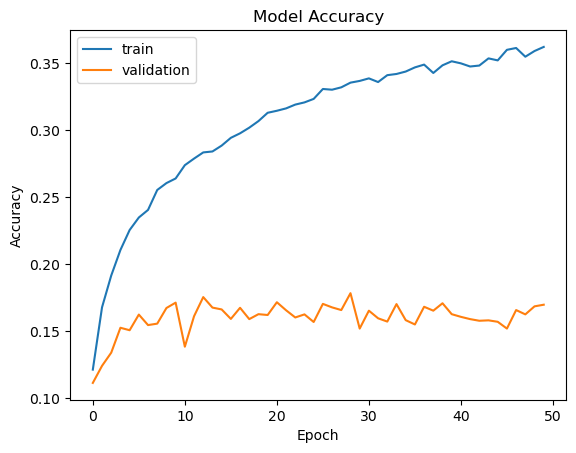

In [21]:
# Step 8: Further Analysis or Visualization
# Plot training/validation accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



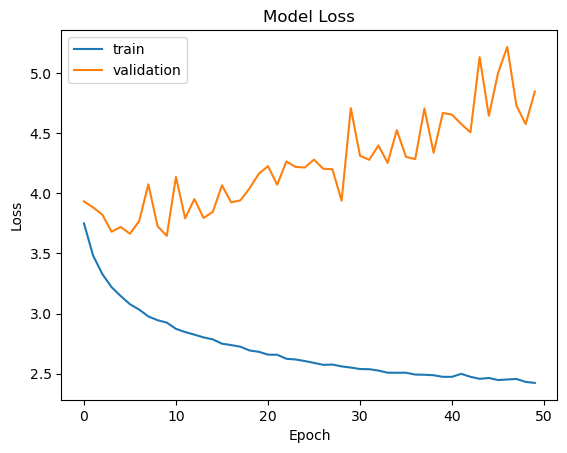

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [25]:
# Visualize misclassified images
misclassified_idx = np.where(train_labels != predicted_classes)[0]
misclassified_images = [image_filenames[idx] for idx in misclassified_idx]

# Plot some of the misclassified images
num_misclassified_images_to_plot = 5
for i in range(num_misclassified_images_to_plot):
    misclassified_image_filename = os.path.join(image_dir, misclassified_images[i])
    misclassified_image = plt.imread(misclassified_image_filename)
    plt.imshow(misclassified_image)
    plt.title(f"True Label: {class_labels[train_labels[misclassified_idx[i]]]}, "
              f"Predicted Label: {class_labels[int(predicted_classes[misclassified_idx[i]])]}")
    plt.axis('off')
    plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


IsADirectoryError: [Errno 21] Is a directory: '/kaggle/input/animals-detection-images-dataset/train/Spider'

In [17]:
# Save the trained model
model.save('trained_model.h5')
print("Trained model saved to disk.")

Trained model saved to disk.
